In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datascience import *
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Question 1

In [22]:
population = pd.read_csv('/content/state-population.csv')
areas = pd.read_csv('/content/state-areas.csv')
abbrevs = pd.read_csv('/content/state-abbrevs.csv')
print(population.head())
print(areas.head())
print(abbrevs.head())


  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [ ]:
merge_df = pd.merge(population, abbrevs, how='outer',left_on='state/region', right_on='abbreviation')
merge_df = merge_df.drop('abbreviation', 1) # drop duplicate info
merge_df

<ipython-input-6-c2ee0b99280b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  merge_df = merge_df.drop('abbreviation', 1) # drop duplicate info


,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama
...,...,...,...,...,...
2539,USA,total,2010,309326295.0,NaN
2540,USA,under18,2011,73902222.0,NaN
2541,USA,total,2011,311582564.0,NaN
2542,USA,under18,2012,73708179.0,NaN


# Finding the missing values

In [ ]:
merge_df.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [ ]:
merge_df[merge_df['population'].isnull()]

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN
2453,PR,under18,1993,NaN,NaN
2454,PR,under18,1992,NaN,NaN
2455,PR,total,1992,NaN,NaN
2456,PR,under18,1994,NaN,NaN
2457,PR,total,1994,NaN,NaN


# Value manipulation

In [ ]:
merge_df.loc[merge_df['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [ ]:
merge_df.loc[merge_df['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merge_df.loc[merge_df['state/region'] == 'USA', 'state'] = 'United States'
merge_df.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

# Concat

In [ ]:
merge_df2 = pd.merge(merge_df, areas, on='state', how='left')
merge_df2

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0
...,...,...,...,...,...,...
2539,USA,total,2010,309326295.0,United States,NaN
2540,USA,under18,2011,73902222.0,United States,NaN
2541,USA,total,2011,311582564.0,United States,NaN
2542,USA,under18,2012,73708179.0,United States,NaN


In [ ]:
merge_df2.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [ ]:
merge_df2['state'][merge_df2['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [ ]:
merge_df2.dropna(inplace=True)
merge_df2.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [ ]:
merge_df2.groupby('state/region')[['population']].mean()

,population
state/region,
AK,4.164389e+05
AL,2.797862e+06
AR,1.686640e+06
AZ,3.337577e+06
CA,2.170908e+07
CO,2.727803e+06
CT,2.128442e+06
DC,3.496533e+05
DE,4.979201e+05


# Aggregation

In [ ]:
merge_df2.groupby(['state/region','ages'])['population'].aggregate('mean').unstack()

ages,total,under18
state/region,,
AK,6.462048e+05,1.866730e+05
AL,4.484528e+06,1.111197e+06
AR,2.693178e+06,6.801024e+05
AZ,5.294600e+06,1.380554e+06
CA,3.433414e+07,9.084020e+06
CO,4.359393e+06,1.096213e+06
CT,3.440903e+06,8.159816e+05
DC,5.870693e+05,1.122373e+05
DE,8.029724e+05,1.928678e+05


# Concat

In [ ]:
pd.concat([population,abbrevs,areas])

,state/region,ages,year,population,state,abbreviation,area (sq. mi)
0,AL,under18,2012.0,1117489.0,NaN,NaN,NaN
1,AL,total,2012.0,4817528.0,NaN,NaN,NaN
2,AL,under18,2010.0,1130966.0,NaN,NaN,NaN
3,AL,total,2010.0,4785570.0,NaN,NaN,NaN
4,AL,under18,2011.0,1125763.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
47,NaN,NaN,NaN,NaN,West Virginia,NaN,24231.0
48,NaN,NaN,NaN,NaN,Wisconsin,NaN,65503.0
49,NaN,NaN,NaN,NaN,Wyoming,NaN,97818.0
50,NaN,NaN,NaN,NaN,District of Columbia,NaN,68.0


In [ ]:
df1 = population
df1

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0
...,...,...,...,...
2539,USA,total,2010,309326295.0
2540,USA,under18,2011,73902222.0
2541,USA,total,2011,311582564.0
2542,USA,under18,2012,73708179.0


In [ ]:
df1.append(abbrevs)

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012.0,1117489.0,NaN,NaN
1,AL,total,2012.0,4817528.0,NaN,NaN
2,AL,under18,2010.0,1130966.0,NaN,NaN
3,AL,total,2010.0,4785570.0,NaN,NaN
4,AL,under18,2011.0,1125763.0,NaN,NaN
...,...,...,...,...,...,...
46,NaN,NaN,NaN,NaN,Virginia,VA
47,NaN,NaN,NaN,NaN,Washington,WA
48,NaN,NaN,NaN,NaN,West Virginia,WV
49,NaN,NaN,NaN,NaN,Wisconsin,WI


In [ ]:
df1.append(areas)

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012.0,1117489.0,NaN,NaN
1,AL,total,2012.0,4817528.0,NaN,NaN
2,AL,under18,2010.0,1130966.0,NaN,NaN
3,AL,total,2010.0,4785570.0,NaN,NaN
4,AL,under18,2011.0,1125763.0,NaN,NaN
...,...,...,...,...,...,...
47,NaN,NaN,NaN,NaN,West Virginia,24231.0
48,NaN,NaN,NaN,NaN,Wisconsin,65503.0
49,NaN,NaN,NaN,NaN,Wyoming,97818.0
50,NaN,NaN,NaN,NaN,District of Columbia,68.0


In [ ]:
merge_df2.count()

state/region     2476
ages             2476
year             2476
population       2476
state            2476
area (sq. mi)    2476
dtype: int64

In [ ]:
merge_df2.mean()

<ipython-input-24-515f2b4d41f9>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merge_df2.mean()


year             2.001557e+03
population       3.482132e+06
area (sq. mi)    7.345269e+04
dtype: float64

In [ ]:
merge_df2.median()

<ipython-input-25-dcb9b72f7969>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merge_df2.median()


year                2002.0
population       1557803.5
area (sq. mi)      56276.0
dtype: float64

In [ ]:
merge_df2.min()

state/region           AK
ages                total
year                 1990
population       101309.0
state             Alabama
area (sq. mi)        68.0
dtype: object

In [ ]:
merge_df2.max()

state/region             WY
ages                under18
year                   2013
population       38332521.0
state               Wyoming
area (sq. mi)      656425.0
dtype: object

In [ ]:
merge_df2.std()

<ipython-input-28-5b7b99c82b7a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merge_df2.std()


year             6.917905e+00
population       4.986552e+06
area (sq. mi)    9.468716e+04
dtype: float64

In [ ]:
merge_df2.var()

<ipython-input-29-07f9f4f50bb1>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merge_df2.var()


year             4.785741e+01
population       2.486570e+13
area (sq. mi)    8.965658e+09
dtype: float64

In [ ]:
merge_df2.mad()

year             5.991466e+00
population       3.126783e+06
area (sq. mi)    4.740079e+04
dtype: float64

In [ ]:
merge_df2.prod()

/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-31-33768af8a24a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merge_df2.prod()


year             0.0
population       inf
area (sq. mi)    inf
dtype: float64

In [ ]:
merge_df2.groupby('population').sum()

,year,area (sq. mi)
population,,
101309.0,2010,68.0
102098.0,2009,68.0
102257.0,2008,68.0
103906.0,2011,68.0
104126.0,2007,68.0
...,...,...
36961229.0,2009,163707.0
37333601.0,2010,163707.0
37668681.0,2011,163707.0


In [ ]:
merge_df2.describe()

,year,population,area (sq. mi)
count,2476.000000,2.476000e+03,2476.000000
mean,2001.556543,3.482132e+06,73452.686591
std,6.917905,4.986552e+06,94687.159589
min,1990.000000,1.013090e+05,68.000000
25%,1996.000000,7.306692e+05,35387.000000
50%,2002.000000,1.557804e+06,56276.000000
75%,2008.000000,4.373440e+06,84904.000000
max,2013.000000,3.833252e+07,656425.000000


In [ ]:
merge_df2.groupby('area (sq. mi)').transform(lambda x: x - x.mean())

<ipython-input-34-9cb653be255e>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  merge_df2.groupby('area (sq. mi)').transform(lambda x: x - x.mean())


,year,population
0,10.5,-1.680373e+06
1,10.5,2.019666e+06
2,8.5,-1.666896e+06
3,8.5,1.987708e+06
4,9.5,-1.672099e+06
...,...,...
2491,3.5,-1.470545e+06
2492,4.5,-1.498163e+06
2493,4.5,1.319090e+06
2494,5.5,-1.525750e+06


In [ ]:
def abc(x):
  x['population per sq.mi']=x['population']/x['area (sq. mi)'].sum()
  return x
merge_df2.groupby('state/region').apply(abc)

,state/region,ages,year,population,state,area (sq. mi),population per sq.mi
0,AL,under18,2012,1117489.0,Alabama,52423.0,0.444099
1,AL,total,2012,4817528.0,Alabama,52423.0,1.914525
2,AL,under18,2010,1130966.0,Alabama,52423.0,0.449455
3,AL,total,2010,4785570.0,Alabama,52423.0,1.901825
4,AL,under18,2011,1125763.0,Alabama,52423.0,0.447388
...,...,...,...,...,...,...,...
2491,PR,under18,2010,896945.0,Puerto Rico,3515.0,9.113442
2492,PR,under18,2011,869327.0,Puerto Rico,3515.0,8.832829
2493,PR,total,2011,3686580.0,Puerto Rico,3515.0,37.457631
2494,PR,under18,2012,841740.0,Puerto Rico,3515.0,8.552530


# Pivot tables

In [ ]:
merge_df2.pivot_table('population',index='year',columns='ages')

ages,total,under18
year,,
1990,4.894565e+06,1.259187e+06
1991,4.960411e+06,1.280647e+06
1992,5.029691e+06,1.304102e+06
1993,5.096443e+06,1.325391e+06
1994,5.159330e+06,1.345901e+06
1995,5.221145e+06,1.362218e+06
1996,5.282241e+06,1.377128e+06
1997,5.346018e+06,1.390603e+06
1998,5.408904e+06,1.400616e+06


# Question 2

In [3]:
q2=pd.read_csv('/content/Fremont_Bridge_Bicycle_Counter.csv',index_col='Date', parse_dates=True)
q2.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


# Index by time

In [4]:
q2.columns=['total','East','West']
q2

,total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2022-09-30 19:00:00,168.0,57.0,111.0
2022-09-30 20:00:00,73.0,33.0,40.0
2022-09-30 21:00:00,69.0,30.0,39.0


# Resample, Shifting Windowing

In [5]:
q2.dropna().describe()

,total,East,West
count,87586.000000,87586.000000,87586.000000
mean,107.240849,48.086623,59.154226
std,134.790561,61.573965,83.567491
min,0.000000,0.000000,0.000000
25%,13.000000,6.000000,7.000000
50%,60.000000,27.000000,30.000000
75%,144.000000,66.000000,75.000000
max,1097.000000,698.000000,850.000000


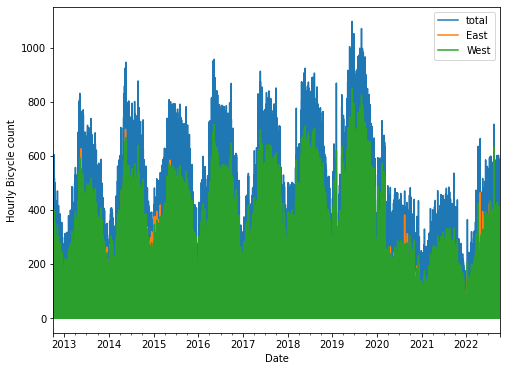

In [9]:
q2.plot(figsize=(8,6))
plt.ylabel("Hourly Bicycle count")
plt.show()

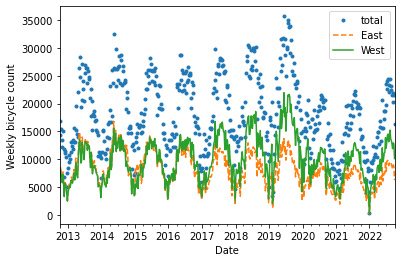

In [19]:
weekly = q2.resample("W").sum()
weekly.plot(style=['.', '--', '-'])
plt.ylabel('Weekly bicycle count')
plt.show()

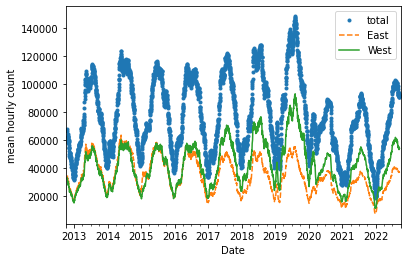

In [20]:
daily = q2.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=['.', '--', '-'])
plt.ylabel('mean hourly count')
plt.show()

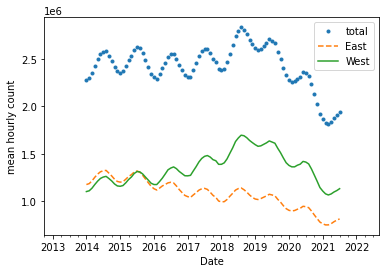

In [21]:
daily = q2.resample('M').sum()
daily.rolling(30, center=True).sum().plot(style=['.', '--', '-'])
plt.ylabel('mean hourly count')
plt.show()

# Time shifts

In [22]:
shift1=q2.shift(2, axis = 0)
shift1.head()

,total,East,West
Date,,,
2012-10-03 00:00:00,NaN,NaN,NaN
2012-10-03 01:00:00,NaN,NaN,NaN
2012-10-03 02:00:00,13.0,4.0,9.0
2012-10-03 03:00:00,10.0,4.0,6.0
2012-10-03 04:00:00,2.0,1.0,1.0


In [23]:
shift1=q2.shift(-2, axis = 0)
shift1.tail()

,total,East,West
Date,,,
2022-09-30 19:00:00,69.0,30.0,39.0
2022-09-30 20:00:00,51.0,10.0,41.0
2022-09-30 21:00:00,59.0,22.0,37.0
2022-09-30 22:00:00,NaN,NaN,NaN
2022-09-30 23:00:00,NaN,NaN,NaN


In [24]:
shift1=q2.shift(1, axis = 1)
shift1.head()

,total,East,West
Date,,,
2012-10-03 00:00:00,NaN,13.0,4.0
2012-10-03 01:00:00,NaN,10.0,4.0
2012-10-03 02:00:00,NaN,2.0,1.0
2012-10-03 03:00:00,NaN,5.0,2.0
2012-10-03 04:00:00,NaN,7.0,6.0


In [25]:
shift1=q2.shift(-1, axis = 1)
shift1.head()

,total,East,West
Date,,,
2012-10-03 00:00:00,4.0,9.0,NaN
2012-10-03 01:00:00,4.0,6.0,NaN
2012-10-03 02:00:00,1.0,1.0,NaN
2012-10-03 03:00:00,2.0,3.0,NaN
2012-10-03 04:00:00,6.0,1.0,NaN


# Visualizing the data

In [26]:
q2.isna().any()

total    True
East     True
West     True
dtype: bool

In [27]:
q2['total'].max()

1097.0

In [28]:
q2[q2['total']==124].index

DatetimeIndex(['2012-10-06 11:00:00', '2012-10-16 10:00:00',
               '2013-03-20 09:00:00', '2013-03-26 06:00:00',
               '2013-04-11 19:00:00', '2013-04-26 13:00:00',
               '2013-05-17 14:00:00', '2013-05-30 20:00:00',
               '2013-06-25 19:00:00', '2013-07-05 00:00:00',
               ...
               '2022-05-28 14:00:00', '2022-06-16 11:00:00',
               '2022-07-06 12:00:00', '2022-07-22 10:00:00',
               '2022-07-24 09:00:00', '2022-07-25 14:00:00',
               '2022-07-30 08:00:00', '2022-08-25 13:00:00',
               '2022-08-26 10:00:00', '2022-09-22 13:00:00'],
              dtype='datetime64[ns]', name='Date', length=197, freq=None)

<ipython-input-29-0bf622149dd8>:6: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  q2.tshift(1000).plot(ax=ax[2])


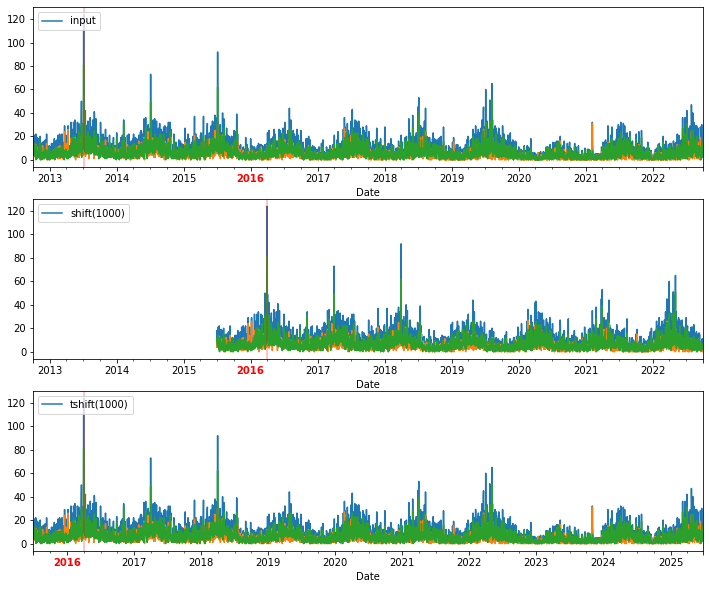

In [29]:
fig, ax = plt.subplots(3, sharey=True)
q2 = q2.asfreq('D', method='pad')
q2.plot(ax=ax[0],figsize=(12,10))
q2.shift(1000).plot(ax=ax[1])
q2.tshift(1000).plot(ax=ax[2])

local_max = pd.to_datetime('2013-07-05')
offset = pd.Timedelta(1000, 'D')
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')


ax[1].legend(['shift(1000)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')


ax[2].legend(['tshift(1000)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

In [30]:
q2['Rolling sum of total'] = q2['total'].rolling(3).sum()
q2

,total,East,West,Rolling sum of total
Date,,,,
2012-10-03,13.0,4.0,9.0,NaN
2012-10-04,18.0,7.0,11.0,NaN
2012-10-05,11.0,4.0,7.0,42.0
2012-10-06,15.0,8.0,7.0,44.0
2012-10-07,11.0,6.0,5.0,37.0
...,...,...,...,...
2022-09-26,5.0,3.0,2.0,54.0
2022-09-27,9.0,3.0,6.0,33.0
2022-09-28,6.0,2.0,4.0,20.0


In [31]:
q2.drop(['Rolling sum of total'],axis=1)

,total,East,West
Date,,,
2012-10-03,13.0,4.0,9.0
2012-10-04,18.0,7.0,11.0
2012-10-05,11.0,4.0,7.0
2012-10-06,15.0,8.0,7.0
2012-10-07,11.0,6.0,5.0
...,...,...,...
2022-09-26,5.0,3.0,2.0
2022-09-27,9.0,3.0,6.0
2022-09-28,6.0,2.0,4.0


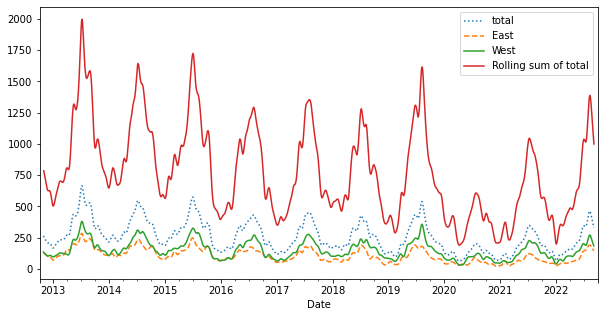

In [32]:
q2.rolling(50, center=True,win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'],figsize=(10,5));

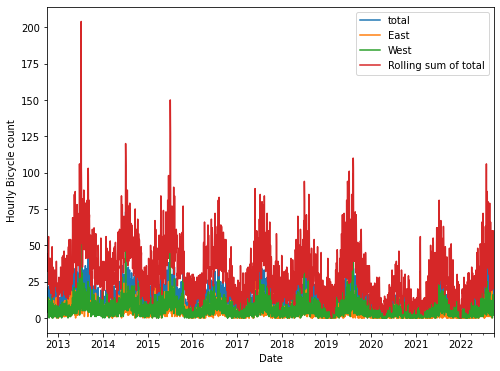

In [34]:
q2.plot(figsize=(8,6))
plt.ylabel("Hourly Bicycle count")
plt.show()

# Question 4

In [43]:
kidney=Table.read_table("https://raw.githubusercontent.com/data-8/materials-sp18/master/lec/ckd.csv").relabeled("Blood Glucose Random","Glucose")
Kidney.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68,80,1.010,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


In [44]:
Kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      158 non-null    int64  
 1   Blood Pressure           158 non-null    int64  
 2   Specific Gravity         158 non-null    float64
 3   Albumin                  158 non-null    int64  
 4   Sugar                    158 non-null    int64  
 5   Red Blood Cells          158 non-null    object 
 6   Pus Cell                 158 non-null    object 
 7   Pus Cell clumps          158 non-null    object 
 8   Bacteria                 158 non-null    object 
 9   Blood Glucose Random     158 non-null    int64  
 10  Blood Urea               158 non-null    int64  
 11  Serum Creatinine         158 non-null    float64
 12  Sodium                   158 non-null    int64  
 13  Potassium                158 non-null    float64
 14  Hemoglobin               1

In [45]:
Kidney.describe()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Class
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,49.563291,74.050633,1.019873,0.797468,0.253165,131.341772,52.575949,2.188608,138.848101,4.636709,13.687342,41.917722,8475.949367,4.891772,0.272152
std,15.512244,11.175381,0.005499,1.413130,0.813397,64.939832,47.395382,3.077615,7.489421,3.476351,2.882204,9.105164,3126.880181,1.019364,0.446483
min,6.000000,50.000000,1.005000,0.000000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,3.100000,9.000000,3800.000000,2.100000,0.000000
25%,39.250000,60.000000,1.020000,0.000000,0.000000,97.000000,26.000000,0.700000,135.000000,3.700000,12.600000,37.500000,6525.000000,4.500000,0.000000
50%,50.500000,80.000000,1.020000,0.000000,0.000000,115.500000,39.500000,1.100000,139.000000,4.500000,14.250000,44.000000,7800.000000,4.950000,0.000000
75%,60.000000,80.000000,1.025000,1.000000,0.000000,131.750000,49.750000,1.600000,144.000000,4.900000,15.775000,48.000000,9775.000000,5.600000,1.000000
max,83.000000,110.000000,1.025000,4.000000,5.000000,490.000000,309.000000,15.200000,150.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000


In [46]:
Kidney.columns

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cell', 'Pus Cell clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Class'],
      dtype='object')

In [61]:
Kidney.shape

(158, 25)

In [50]:
import numpy as np
def standard_units(stand):
  return (stand-np.mean(stand))/np.std(stand)

kidney = Table().with_columns(
    'Hemoglobin',standard_units(kidney.column('Hemoglobin')),
    'Glucose',standard_units(kidney.column('Glucose')),
    'White Blood Cell Count',standard_units(kidney.column('White Blood Cell Count')),
    'Class',kidney.column('Class'))
df1

Hemoglobin,Glucose,White Blood Cell Count,Class
-0.865744,-0.221549,-0.569768,1
-1.45745,-0.947597,1.16268,1
-1.00497,3.84123,-1.27558,1
-2.81488,0.396364,0.809777,1
-2.08395,0.643529,0.232293,1
-1.35303,-0.561402,-0.505603,1
-0.413266,2.04928,0.360623,1
-1.28342,-0.947597,3.34429,1
-1.10939,1.87936,-0.409356,1
-1.35303,0.489051,1.96475,1


Class | Hemoglobin | Glucose     | White Blood Cell Count | Color
0     | 0.456884   | 0.133751    | 0.617283               | gold
0     | 1.153      | -0.947597   | 0.424788               | gold
0     | 0.770138   | -0.762223   | 0.200211               | gold
0     | 0.596108   | -0.190654   | -0.73018               | gold
0     | -0.239236  | -0.49961    | -0.0564489             | gold
0     | -0.0304002 | -0.159758   | 0.232293               | gold
0     | 0.282854   | -0.00527964 | 0.71353                | gold
0     | 0.108824   | -0.623193   | 0.200211               | gold
0     | 0.0740178  | -0.515058   | -0.0243664             | gold
0     | 0.83975    | -0.422371   | -1.33975               | gold
... (148 rows omitted)


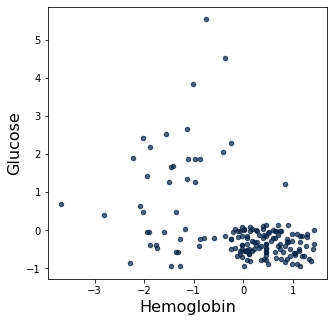

In [53]:
color_table=Table().with_columns(
    'Class',make_array(1,0),
    'Color',make_array('darkblue','gold'))
kidney=kidney.join('Class',color_table)
print(kidney)
kidney.scatter('Hemoglobin','Glucose')

(-2.0, 6.0)

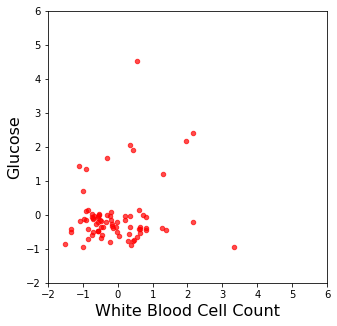

In [54]:
shuffled_ckd = kidney.sample(with_replacement=False)
training = shuffled_ckd.take(np.arange(79))
testing = shuffled_ckd.take(np.arange(79,150))
training.scatter('White Blood Cell Count','Glucose',color='red')
plt.xlim(-2,6)
plt.ylim(-2,6)

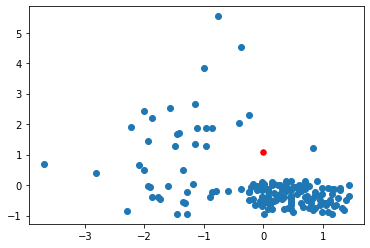

In [55]:
alice = make_array(0, 1.1)
Color=make_array('darkblue','gold')
plt.scatter(kidney.column(1), kidney.column(2))
plt.scatter(alice.item(0), alice.item(1), color='red', s=30);

In [56]:
table_attributes = kidney.select('Hemoglobin','Glucose')
alice=make_array(0,1.1)

In [65]:
def distance(point1,point2):
  return np.sqrt(np.sum((point1-point2)**2))
def convert(row):
  return distance(alice,np.array(row))
distances = table_attributes.apply(convert)
table_with_distances = kidney.with_column('Distance from Alice',distances)
table_with_distances

Class,Hemoglobin,Glucose,White Blood Cell Count,Color,Distance from Alice
0,0.456884,0.133751,0.617283,gold,1.06882
0,1.153,-0.947597,0.424788,gold,2.34991
0,0.770138,-0.762223,0.200211,gold,2.01519
0,0.596108,-0.190654,-0.73018,gold,1.42166
0,-0.239236,-0.49961,-0.0564489,gold,1.6174
0,-0.0304002,-0.159758,0.232293,gold,1.26012
0,0.282854,-0.00527964,0.71353,gold,1.1409
0,0.108824,-0.623193,0.200211,gold,1.72663
0,0.0740178,-0.515058,-0.0243664,gold,1.61675
0,0.83975,-0.422371,-1.33975,gold,1.73862


In [67]:
sorted_by_distance = table_with_distances.sort('Distance from Alice')
sorted_by_distance

Class,Hemoglobin,Glucose,White Blood Cell Count,Color,Distance from Alice
1,0.83975,1.2151,1.29101,darkblue,0.847601
1,-0.970162,1.27689,-0.345191,darkblue,0.986156
0,-0.0304002,0.0874074,-0.184779,gold,1.01305
0,0.14363,0.0874074,0.32854,gold,1.02273
1,-0.413266,2.04928,0.360623,darkblue,1.03534
0,0.387272,0.118303,-0.922675,gold,1.05532
0,0.456884,0.133751,0.617283,gold,1.06882
0,0.178436,0.0410639,0.71353,gold,1.07386
0,0.00440582,0.025616,0.232293,gold,1.07439
0,-0.169624,0.025616,-0.537686,gold,1.08769


In [68]:
alice_5_nn = sorted_by_distance.take(np.arange(5))
alice_5_nn

Class,Hemoglobin,Glucose,White Blood Cell Count,Color,Distance from Alice
1,0.83975,1.2151,1.29101,darkblue,0.847601
1,-0.970162,1.27689,-0.345191,darkblue,0.986156
0,-0.0304002,0.0874074,-0.184779,gold,1.01305
0,0.14363,0.0874074,0.32854,gold,1.02273
1,-0.413266,2.04928,0.360623,darkblue,1.03534


Therefore, 2 of 5 nearest neighbours are gold and the remaining 3 are darkblue in color. So from the classifier, the Alice is considered with color blue i.e., Alice has CKD.

# Question 6

In [80]:
import pandas as pd
bcancer=pd.read_csv('/content/breast-cancer.csv')
bcancer

,age,mefalsepause,tumor-size,inv-falsedes,falsede-caps,deg-malig,breast,breast-quad,irradiat,class
0,40-49,premefalse,15-19,0-2,True,3,right,left_up,False,recurrence-events
1,50-59,ge40,15-19,0-2,False,1,right,central,False,false-recurrence-events
2,50-59,ge40,35-39,0-2,False,2,left,left_low,False,recurrence-events
3,40-49,premefalse,35-39,0-2,True,3,right,left_low,True,false-recurrence-events
4,40-49,premefalse,30-34,3-5,True,2,left,right_up,False,recurrence-events
...,...,...,...,...,...,...,...,...,...,...
267,50-59,ge40,30-34,6-8,True,2,left,left_low,False,false-recurrence-events
268,50-59,premefalse,25-29,3-5,True,2,left,left_low,True,false-recurrence-events
269,30-39,premefalse,30-34,6-8,True,2,right,right_up,False,false-recurrence-events
270,50-59,premefalse,15-19,0-2,False,2,right,left_low,False,false-recurrence-events


In [81]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
bcancer['class']= label_encoder.fit_transform(bcancer['class'])
bcancer['breast']= label_encoder.fit_transform(bcancer['breast'])
bcancer['falsede-caps']= label_encoder.fit_transform(bcancer['falsede-caps'])
bcancer['mefalsepause']= label_encoder.fit_transform(bcancer['mefalsepause'])
bcancer['breast-quad']= label_encoder.fit_transform(bcancer['breast-quad'])
bcancer['irradiat']= label_encoder.fit_transform(bcancer['irradiat'])
bcancer['inv-falsedes']= label_encoder.fit_transform(bcancer['inv-falsedes'])
bcancer['tumor-size']= label_encoder.fit_transform(bcancer['tumor-size'])
bcancer

,age,mefalsepause,tumor-size,inv-falsedes,falsede-caps,deg-malig,breast,breast-quad,irradiat,class
0,40-49,2,2,0,1,3,1,2,0,1
1,50-59,0,2,0,0,1,1,0,0,0
2,50-59,0,6,0,0,2,0,1,0,1
3,40-49,2,6,0,1,3,1,1,1,0
4,40-49,2,5,4,1,2,0,4,0,1
...,...,...,...,...,...,...,...,...,...,...
267,50-59,0,5,5,1,2,0,1,0,0
268,50-59,2,4,4,1,2,0,1,1,0
269,30-39,2,5,5,1,2,1,4,0,0
270,50-59,2,2,0,0,2,1,1,0,0


In [82]:
bcancer=bcancer.drop("age",axis=1)
bcancerup=bcancer.drop("class",axis=1)
bcancerup

,mefalsepause,tumor-size,inv-falsedes,falsede-caps,deg-malig,breast,breast-quad,irradiat
0,2,2,0,1,3,1,2,0
1,0,2,0,0,1,1,0,0
2,0,6,0,0,2,0,1,0
3,2,6,0,1,3,1,1,1
4,2,5,4,1,2,0,4,0
...,...,...,...,...,...,...,...,...
267,0,5,5,1,2,0,1,0
268,2,4,4,1,2,0,1,1
269,2,5,5,1,2,1,4,0
270,2,2,0,0,2,1,1,0


In [83]:
clf = svm.SVC(random_state=42)
k_folds = KFold(n_splits = 5)
scores = cross_val_score(clf,bcancerup,bcancer["class"], cv = k_folds)
print(scores)
print(scores.mean())

[ 0.69090909  0.67272727  0.72222222  0.74074074  0.68518519]
0.702356902357


In [87]:
x_train,x_test,y_train,y_test = train_test_split(bcancerup,bcancer["class"],test_size=0.2)


In [88]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [89]:
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test,y_pred)
matrix

array([[37,  4],
       [12,  2]])

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.70909090909090911

In [93]:
clf = RandomForestClassifier(random_state=42)
k_folds = KFold(n_splits = 5)
scores = cross_val_score(clf, bcancerup,bcancer["class"], cv = k_folds)
print(scores)
print(scores.mean())

[ 0.70909091  0.69090909  0.75925926  0.66666667  0.77777778]
0.720740740741


In [94]:
clf=RandomForestClassifier()
clf=clf.fit(bcancerup,bcancer["class"])
pred=clf.predict(x_test)
pred

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0])

In [95]:
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test,pred)
matrix

array([[40,  1],
       [ 1, 13]])

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.96363636363636362

# Question 7

In [97]:
home= pd.read_csv('/content/House.csv')
home.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [98]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [99]:
home.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [101]:
obj_colums = home.describe(include='object').columns

In [102]:
home.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [103]:
obj_colums

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [104]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
lab=LabelEncoder()
for i in obj_colums:
    home[i]=lab.fit_transform(home[[i]])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [105]:
all_cols = home.columns
all_cols

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [106]:
mms = MinMaxScaler()

In [107]:
for i in all_cols[1:]:
    home[i]=mms.fit_transform(home[[i]])

In [108]:
home.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,0.240587,0.393028,0.095413,0.268502,0.858716,0.177982,0.350459,0.045872,0.315596,0.231193,0.234862,0.534862
std,1.870440e+06,0.149151,0.147613,0.167490,0.289164,0.348635,0.382849,0.477552,0.209399,0.465180,0.287195,0.424302,0.380686
min,1.750000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,0.134021,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,0.202749,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,5.740000e+06,0.323711,0.400000,0.333333,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000
max,1.330000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
yh= home.pop('price')
Xh = home
Xh_train,Xh_test,yh_train,yh_test = train_test_split(Xh,yh,test_size=0.2,random_state=42)
Xh_train.shape

(436, 12)

In [110]:
Xh_test.shape

(109, 12)

In [111]:
Xh_test.shape

(109, 12)

In [112]:
yh_train.shape

(436,)

In [113]:
yh_test.shape

(109,)

In [116]:
regressor = LinearRegression()
knr = KNeighborsRegressor()
regressor.fit(Xh_train,yh_train)
home_pred = regressor.predict(Xh_test)
knr.fit(Xh_train,yh_train)
khome_pred = knr.predict(Xh_test)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


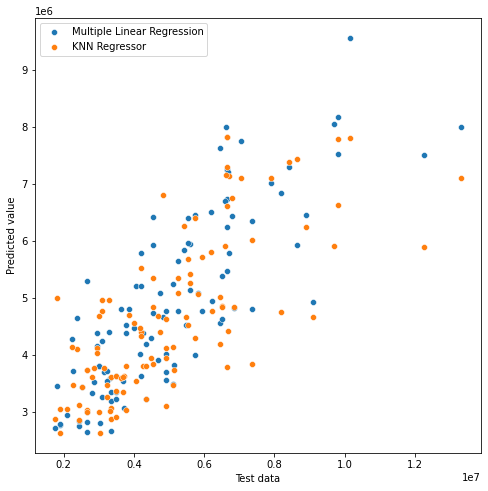

In [117]:
plt.figure(figsize=(8,8))
sns.scatterplot(yh_test,home_pred)
sns.scatterplot(yh_test,khome_pred)
plt.legend(['Multiple Linear Regression','KNN Regressor'])
plt.xlabel('Test data')
plt.ylabel('Predicted value')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


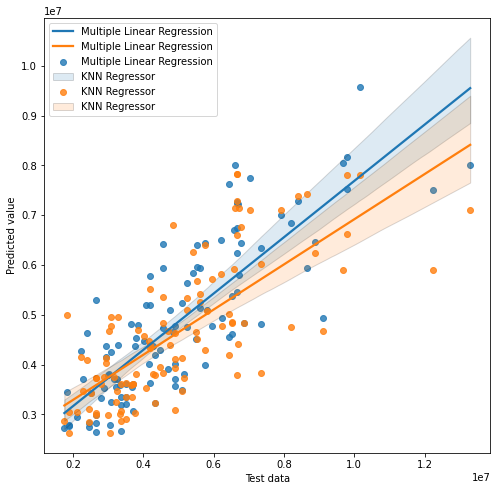

In [118]:
plt.figure(figsize=(8,8))
sns.regplot(yh_test,home_pred)
sns.regplot(yh_test,khome_pred)
plt.legend(['Multiple Linear Regression','Multiple Linear Regression','Multiple Linear Regression','KNN Regressor','KNN Regressor','KNN Regressor'])
plt.xlabel('Test data')
plt.ylabel('Predicted value')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


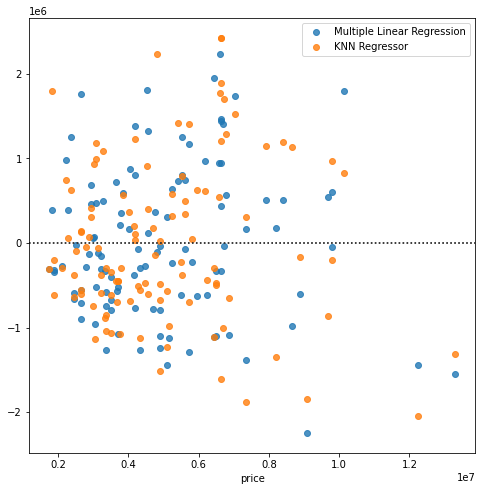

In [119]:
plt.figure(figsize=(8,8))
sns.residplot(yh_test,home_pred,label='Multiple Linear Regression')
sns.residplot(yh_test,khome_pred,label='KNN Regressor')
plt.legend()

In [120]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
#mlr
rmae = mean_absolute_error(yh_test,home_pred)
rmse = mean_squared_error(yh_test,home_pred)
rr2 = r2_score(yh_test,home_pred)
#knnr
kmae = mean_absolute_error(yh_test,khome_pred)
kmse = mean_squared_error(yh_test,khome_pred)
kr2 = r2_score(yh_test,khome_pred)
metrics = {'MAE':[rmae,kmae],'MSE':[rmse,kmse],'R2 score':[rr2,kr2]}
metrics_df = pd.DataFrame(metrics)
metrics_df.index=['Multiple Linear Regression','KNN Regressor']
metrics_df

,MAE,MSE,R2 score
Multiple Linear Regression,9.796797e+05,1.771751e+12,0.649475
KNN Regressor,1.107997e+06,2.531899e+12,0.499087


# Question 8

In [122]:
titanic = pd.read_csv("/content/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
x = titanic.iloc[:,:-2]
y = titanic.iloc[:,-1]

In [134]:
enc = LabelEncoder()
for i in x:
    if x[i].dtype == "O" or x[i].dtype == "float64" or x[i].dtype == "category" or x[i].dtype == "bool":
        x[i] = enc.fit_transform(x[i])

titanic['Embarked']= label_encoder.fit_transform(titanic['Embarked'])

In [139]:
titanic.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,2
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,2
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,2
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,2
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,2
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,2


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8)
logistic = LogisticRegression()
logistic.fit(x_train,y_train)

In [130]:
y_predict = logistic.predict(x_test)
y_predict

array(['S', 'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'Q', 'S', 'C',
       'C', 'S', 'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'Q', 'S', 'S',
       'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'Q', 'Q', 'S', 'S',
       'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S',
       'C', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'C',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'C', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'Q',
       'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S',
       'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'Q',
       'C', 'S', 'S', 'S', 'S', 'C', 'Q', 'S', 'S', 'S', 'S', 'S

In [ ]:
print(accuracy_score(y_predict,y_test))